In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Build the network-in-network model
model = Sequential([
    Conv2D(192, (5, 5), padding='same', input_shape=(32, 32, 3)),
    Activation('relu'),
    Conv2D(160, (1, 1)),
    Activation('relu'),
    Conv2D(96, (1, 1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout(0.5),

    Conv2D(192, (5, 5), padding='same'),
    Activation('relu'),
    Conv2D(192, (1, 1)),
    Activation('relu'),
    Conv2D(192, (1, 1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout(0.5),

    Conv2D(192, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(192, (1, 1)),
    Activation('relu'),
    Conv2D(10, (1, 1)),
    Activation('relu'),
    AveragePooling2D(pool_size=(7, 7)),  # Adjusted pool size
    Flatten()
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model for 20 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 39s 15ms/step - loss: 2.1252 - accuracy: 0.1855 - val_loss: 2.0025 - val_accuracy: 0.2398
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7521 - accuracy: 0.3392 - val_loss: 1.6066 - val_accuracy: 0.4117
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6367 - accuracy: 0.3991 - val_loss: 1.4920 - val_accuracy: 0.4704
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4810 - accuracy: 0.4697 - val_loss: 1.3734 - val_accuracy: 0.5190
Epoch 5/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.3931 - accuracy: 0.5048 - val_loss: 1.4641 - val_accuracy: 0.4716
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.6675 - accuracy: 0.3806 - val_loss: 1.4876 - val_accuracy: 0.4538
Epoch 7/10
1563/1563 [==============================] - 2

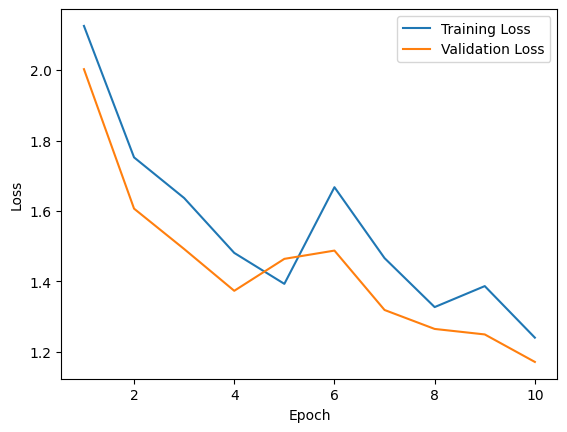

In [2]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(range(1,21),history.history['loss'], label='Training Loss')
plt.plot(range(1,21),history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

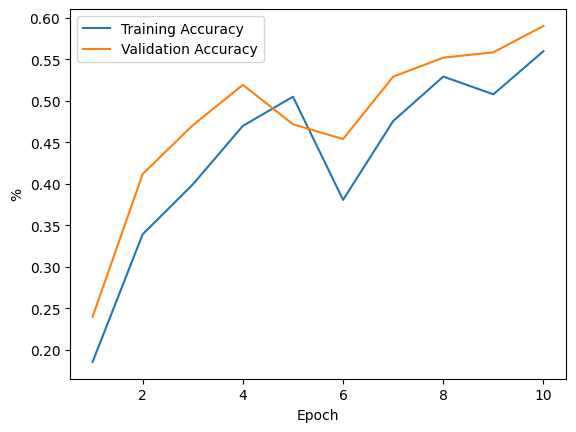

In [3]:
# Plot the acc
plt.plot(range(1,21),history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1,21),history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('%')
plt.legend()
plt.show()